<font color='Blue'>First thing we gonna do is we will find the keypoint using the SIFT algorithm libary<br><br>
We will start with imports and read the images and display them.<font>


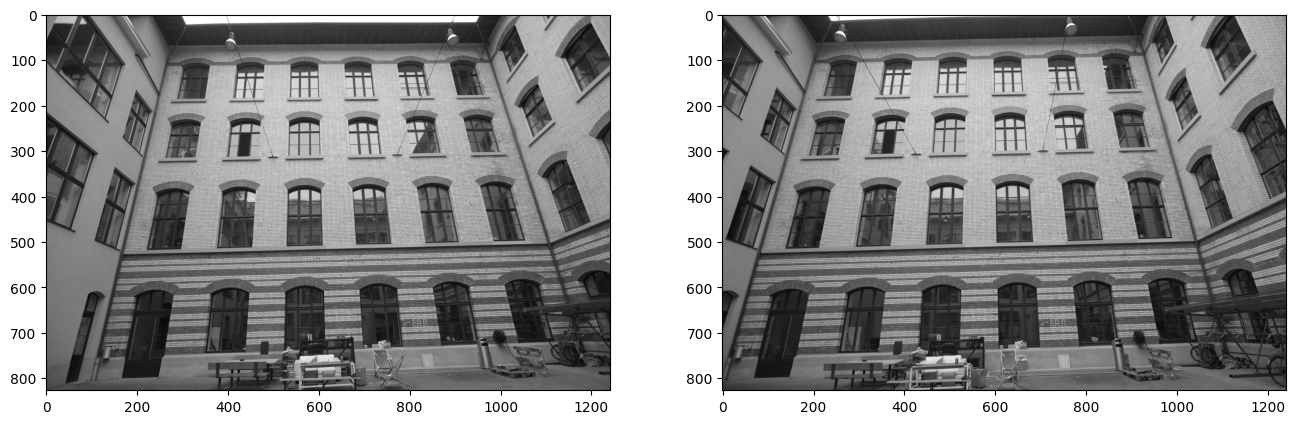

In [49]:
import cv2 
import matplotlib.pyplot as plt

img1_path = 'example_1/I1.png'
img2_path = 'example_1/I2.png'

# read images
img1 = cv2.imread(img1_path)  
img2 = cv2.imread(img2_path) 

#display tehm
figure, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

<font color='Blue'>NOW first Question what we are going to do is to find the Keypoints in both images<Br>
We will Use the SIFT algorithm to detect the keypoint<br><br>
first we create a SIFT object using sift_create and then use the function detectAndCompute to get the keypoints. It will return two values – the keypoints and the sift computer vision descriptors..<font>


In [50]:
# SIFT
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# Print the number of keypoints detected in each image
print("Length of keypoints_1:", len(keypoints_1))
print("Length of keypoints_2:", len(keypoints_2))

Length of keypoints_1: 5766
Length of keypoints_2: 6427


<font color='Blue'>here is the images drawn on them the keypoints <font>

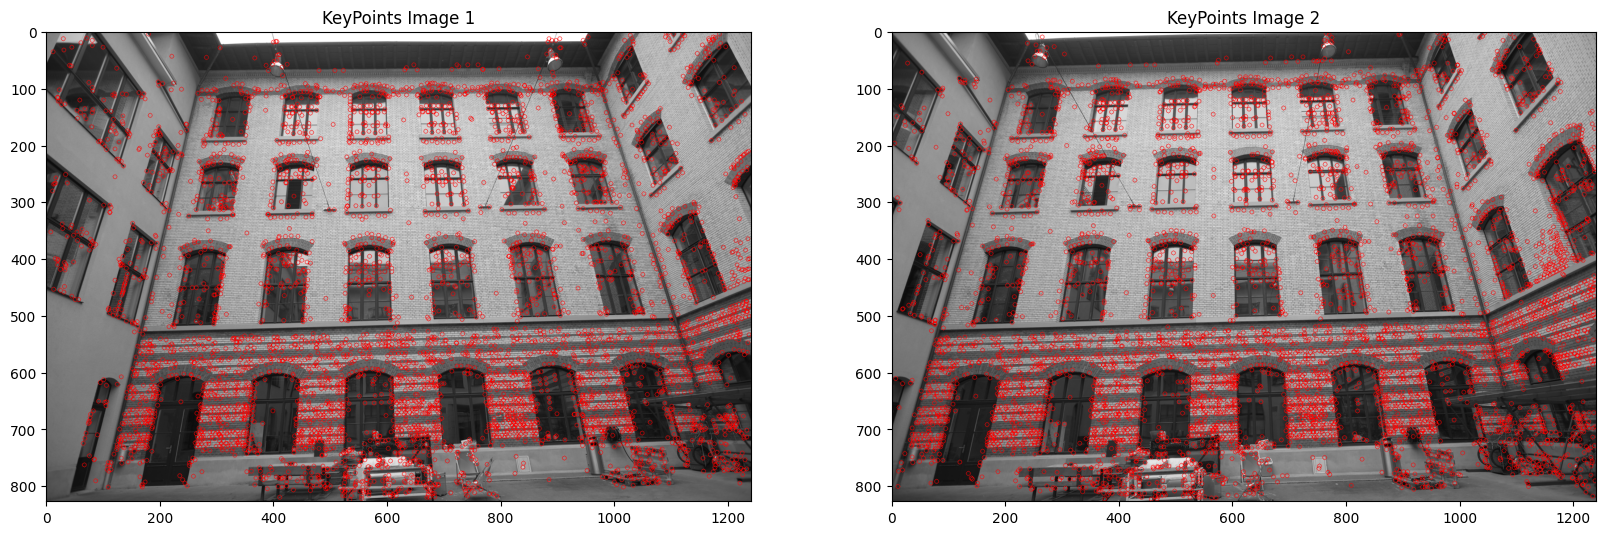

In [51]:
# Create copies of the original images to avoid modifying them directly
img1_with_circles = img1.copy()
img2_with_circles = img2.copy()

# Define circle parameters
circle_color = (255, 0, 0)  # Green color for the circle
circle_radius = 4  # Radius of the circle
circle_thickness = 1  # Thickness of the circle's outline

# Iterate through each keypoint in keypoints_1 and draw a circle on img1_with_circles
for kp in keypoints_1:
    center_coordinates = (int(kp.pt[0]), int(kp.pt[1]))  # Convert the float coordinates to integer
    cv2.circle(img1_with_circles, center_coordinates, circle_radius, circle_color, circle_thickness)

# Iterate through each keypoint in keypoints_2 and draw a circle on img2_with_circles
for kp in keypoints_2:
    center_coordinates = (int(kp.pt[0]), int(kp.pt[1]))  # Convert the float coordinates to integer
    cv2.circle(img2_with_circles, center_coordinates, circle_radius, circle_color, circle_thickness)

# Display the images with circles marking the keypoints
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1), plt.imshow(img1_with_circles), plt.title('KeyPoints Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2_with_circles), plt.title('KeyPoints Image 2')
plt.show()

<font color=blue>2.Now we gonna find the Matches bettwen the 2 images using the cv2.BFMatcher

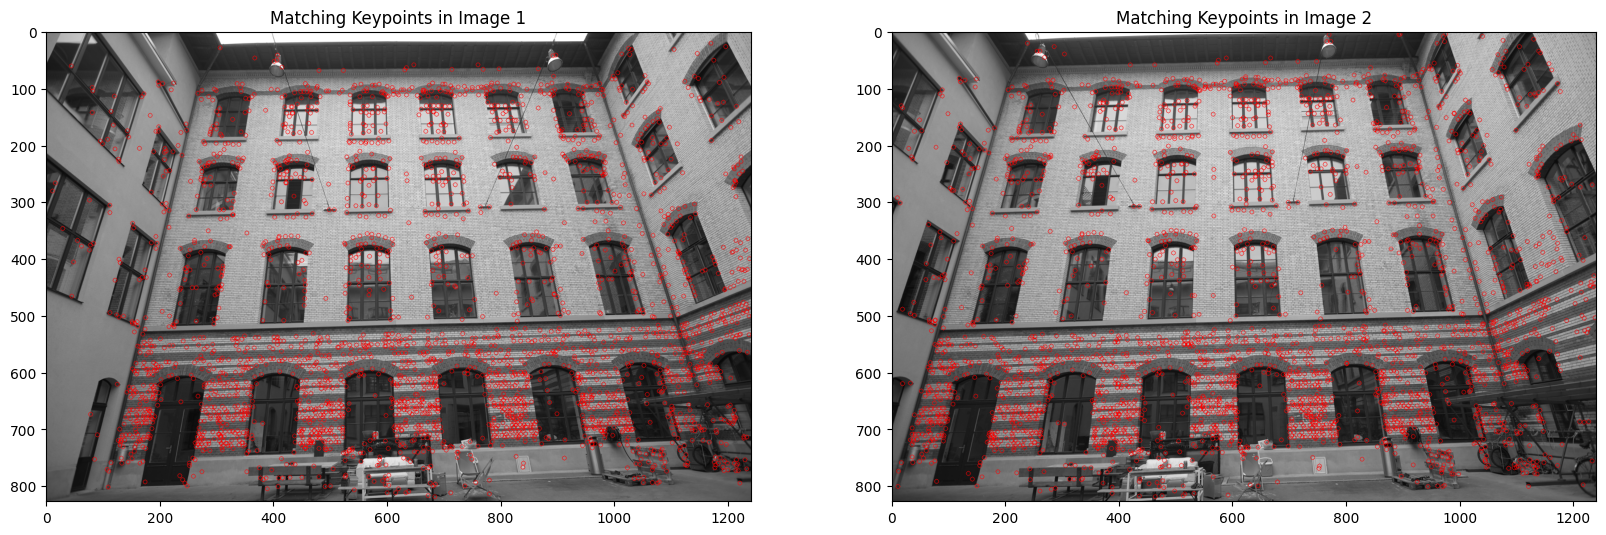

In [60]:
img1_copy = img1.copy()
img2_copy = img2.copy()
# Extract indices of matching keypoints
keypoints_1_indices = [match.queryIdx for match in matches]
keypoints_2_indices = [match.trainIdx for match in matches]

# Filter the keypoints based on the indices of matches
matching_keypoints_1 = [keypoints_1[i] for i in keypoints_1_indices]
matching_keypoints_2 = [keypoints_2[i] for i in keypoints_2_indices]

# Draw matching keypoints on each image using cv2.circle
for kp in matching_keypoints_1:
    img1_copy = cv2.circle(img1_copy, (int(kp.pt[0]), int(kp.pt[1])), radius=4, color=(255, 0, 0), thickness=1)

for kp in matching_keypoints_2:
    img2_copy = cv2.circle(img2_copy, (int(kp.pt[0]), int(kp.pt[1])), radius=4, color=(255, 0, 0), thickness=1)

# Display the images with matching keypoints drawn as circles
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1), plt.imshow(img1_copy), plt.title('Matching Keypoints in Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2_copy), plt.title('Matching Keypoints in Image 2')
plt.show()

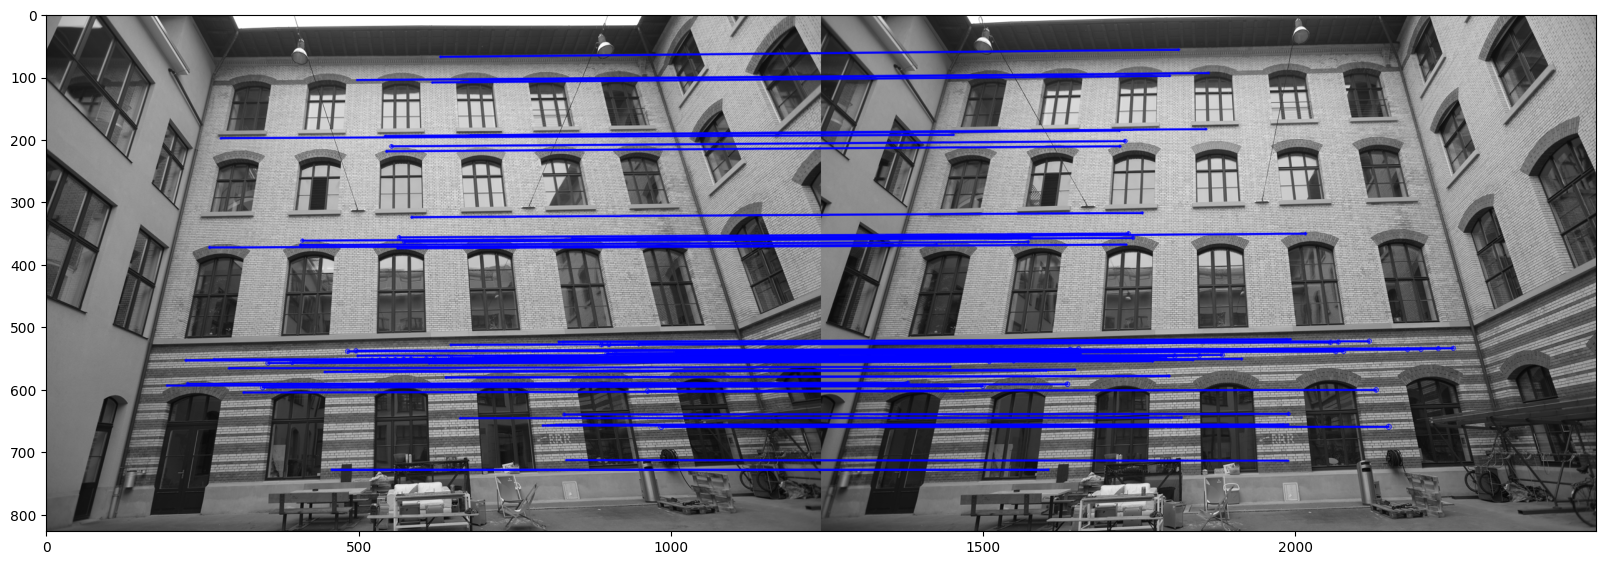

In [61]:

# Step 1: Initialize the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Step 2: Match descriptors
matches = bf.match(descriptors_1, descriptors_2)

# Step 3: Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Step 4: Draw the first 50 matches with better visibility and specified color and thickness
num_matches_to_draw = 80
best_matches = matches[:num_matches_to_draw]

# Specify matchColor for all lines (BGR format) and thickness
matchColor = (0, 0, 255) # Red color
lineThickness = 2 # Decrease line thickness for less bold lines

img_matches = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, best_matches, None, 
                              flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS | cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
                              matchColor=matchColor, singlePointColor=None, matchesThickness=lineThickness)

# Display the matches with increased figure size for better visibility
plt.figure(figsize=(20,10))
plt.imshow(img_matches)
plt.show()

In [62]:
K_mat_path = 'example_1/K.txt'
K_mat = np.loadtxt(K_mat_path, delimiter=',')

matching_keypoints_1 = np.float32([keypoints_1[i.queryIdx].pt for i in matches])
matching_keypoints_2 = np.float32([keypoints_2[i.queryIdx].pt for i in matches])

# Find the Fundamental matrix and the mask for inliers
F, mask = cv2.findFundamentalMat(matching_keypoints_1, matching_keypoints_2, cv2.FM_RANSAC)

# Filter keypoints based on the mask
inliers_keypoints_1 = matching_keypoints_1[mask.ravel() == 1]
inliers_keypoints_2 = matching_keypoints_2[mask.ravel() == 1]

# Recompute the Essential matrix using only inliers if necessary
# Note: This step is optional and depends on your specific requirements
E = K_mat.T @ F @ K_mat

# Print the Fundamental matrix
print("Fundamental matrix:")
print(F)

# Print the Essential matrix
print("\nEssential matrix:")
print(E)

# Optionally, print the number of inliers
print("\nNumber of inliers:", len(inliers_keypoints_1))

NameError: name 'np' is not defined

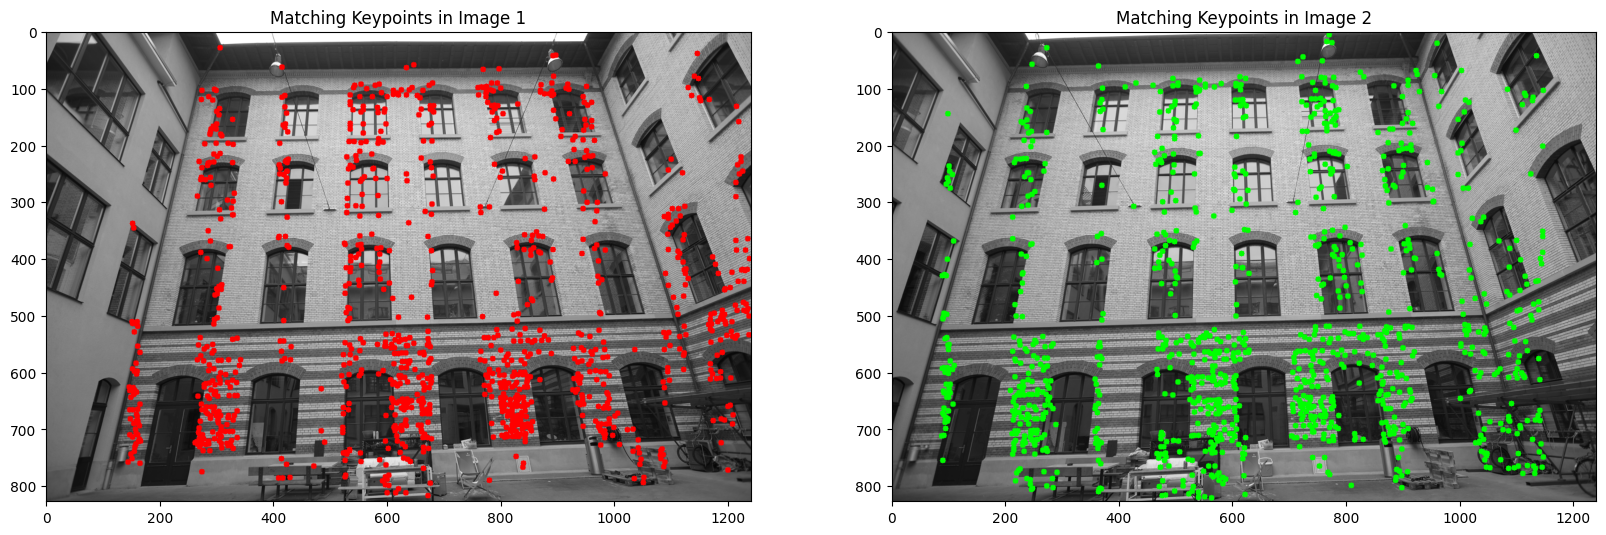

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'KeyPoint'
> Overload resolution failed:
>  - KeyPoint() missing required argument 'size' (pos 3)


In [ ]:
for point in inliers_keypoints_1:
    x, y = point.ravel()
    cv2.circle(img1, (int(x), int(y)), 5, (255, 0, 0), -1)

for point in inliers_keypoints_2:
    x, y = point.ravel()
    cv2.circle(img2, (int(x), int(y)), 5, (0, 255, 0), -1)

# Display the images
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1), plt.imshow(img1), plt.title('Matching Keypoints in Image 1')
plt.subplot(1, 2, 2), plt.imshow(img2), plt.title('Matching Keypoints in Image 2')
plt.show()

